# check getdata_dhdt working
getdata_dhdt(self,cycle_number_from,cycle_number_till)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import rasterio as rio
import pandas as pd
import xarray as xr

In [8]:
import sys
sys.path.append('/Users/home/whitefar/DATA/code/REMOTE_SENSING/ICESAT/')
from cross_channel import icesat_dataset

In [9]:
ds = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20200716.nc")

For this dataset
cycle number, corresponding number of points
7    1175
6    1175
5    1175
4    1175
3    1175
2    1175
1    1175
8    1175
Name: cycle_number, dtype: int64
cycle number, corresponding number of non NaN points
3    1153
7     777
5     639
4     523
6     368
8      80
Name: cycle_number, dtype: int64


In [24]:
aa = xr.open_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20200716.nc", engine="h5netcdf")

In [25]:
aa

<xarray.Dataset>
Dimensions:                    (cycle_number: 8, poly_exponent_x: 8, poly_exponent_y: 8, ref_pt: 41145)
Coordinates:
  * cycle_number               (cycle_number) int8 1 2 3 4 5 6 7 8
    delta_time                 (ref_pt, cycle_number) datetime64[ns] ...
    latitude                   (ref_pt) float64 ...
    longitude                  (ref_pt) float64 ...
    maxcycle                   (ref_pt) int64 ...
    mincycle                   (ref_pt) int64 ...
  * poly_exponent_x            (poly_exponent_x) int8 1 0 2 1 0 3 2 1
  * poly_exponent_y            (poly_exponent_y) int8 0 1 0 1 2 0 1 2
  * ref_pt                     (ref_pt) int64 1462146 1462149 ... 1545789
    referencegroundtrack       (ref_pt) int64 ...
    x                          (ref_pt) float64 ...
    y                          (ref_pt) float64 ...
Data variables:
    at_slope                   (ref_pt) float32 ...
    complex_surface_flag       (ref_pt) float64 ...
    curvature                  (ref_pt) float32 ...
    deg_x                      (ref_pt) float64 ...
    deg_y                      (ref_pt) float64 ...
    dem_h                      (ref_pt) float32 ...
    e_slope                    (ref_pt) float32 ...
    fit_quality                (ref_pt) float64 ...
    h_corr                     (ref_pt, cycle_number) float32 ...
    h_corr_sigma               (ref_pt, cycle_number) float32 ...
    h_corr_sigma_systematic    (ref_pt, cycle_number) float32 ...
    misfit_RMS                 (ref_pt) float32 ...
    misfit_chi2r               (ref_pt) float32 ...
    n_slope                    (ref_pt) float32 ...
    poly_coeffs                (ref_pt, poly_exponent_x) float32 ...
    poly_coeffs_sigma          (ref_pt, poly_exponent_x) float32 ...
    quality_summary            (ref_pt, cycle_number) float64 ...
    rgt_azimuth                (ref_pt) float32 ...
    slope_change_rate_x        (ref_pt) float32 ...
    slope_change_rate_x_sigma  (ref_pt) float32 ...
    slope_change_rate_y        (ref_pt) float32 ...
    slope_change_rate_y_sigma  (ref_pt) float32 ...
    utc_time                   (ref_pt, cycle_number) datetime64[ns] ...
    x_atc                      (ref_pt) float64 ...
    xt_slope                   (ref_pt) float32 ...
    y_atc                      (ref_pt) float64 ...
Attributes:
    ATL06_xover_field_list:   ['delta_time' 'h_li' 'h_li_sigma' 'latitude' 'l...
    L_search_AT:              60
    L_search_XT:              65
    N_coeffs:                 8
    N_poly_coeffs:            8
    N_search:                 3.0
    ReferenceGroundTrack:     766.0
    beam_pair:                1
    beam_spacing:             90
    equatorial_radius:        6378137
    first_cycle:              1
    last_cycle:               7
    max_fit_iterations:       20
    pair_yatc_ctr_tol:        1000
    polar_radius:             6356752.3
    poly_exponent_list:       [[1 0]\n [0 1]\n [2 0]\n [1 1]\n [0 2]\n [3 0]\...
    poly_exponent_x:          [1 0 2 1 0 3 2 1]
    poly_exponent_y:          [0 1 0 1 2 0 1 2]
    poly_max_degree_AT:       3
    poly_max_degree_XT:       2
    seg_atc_spacing:          100
    seg_number_skip:          3.0
    seg_sigma_threshold_min:  0.05
    slope_change_t0:          29548800
    t_scale:                  31557600.0
    xy_scale:                 100.0

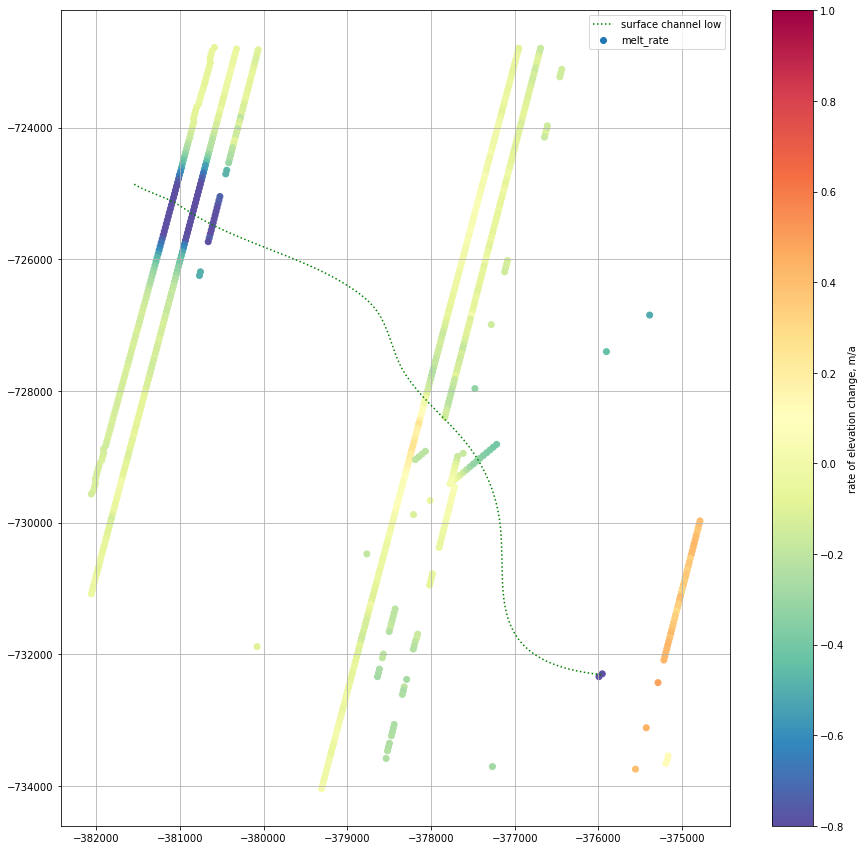

In [10]:
ds.plot_dhdt_map(cycle_number_from=3,cycle_number_till=7)

In [11]:
ds.getdata_dhdt(cycle_number_from=3,cycle_number_till=7)

In [20]:
xr.open_dataset(

Index(['cycle_number', 'ref_pt', 'h_corr', 'utc_time', 'h_corr_sigma',
       'longitude', 'latitude', 'x', 'mincycle', 'maxcycle',
       'referencegroundtrack', 'delta_time', 'y', 'geometry'],
      dtype='object')

In [ ]:
ds.plot_multiple_dhdt_crosssection_map(cycle_number_from=3,cycle_number_till=7,
                                       icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'down'],
                                                       [7,'up'],[6,'down']],
                                      buff=100,vmin=-1.2,vmax=0.2)

In [ ]:
ds.plot_multiple_dhdt_crosssection(cycle_number_from=3,cycle_number_till=7,                                    
                                   icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'up'],
                                                       [7,'down'],[6,'up']])

# plot rema diff with icesat2 diff

In [ ]:
cycle_number_from=3
cycle_number_till=7
# This dataframe has h_corr from cycle_number_from, and dhdt. Times are from cycle_number_from
dadh = gpd.GeoDataFrame( ds.gda[ds.gda.cycle_number==cycle_number_from],geometry=ds.gda.geometry )
dadh['dh'] =(ds.gda[ds.gda.cycle_number==cycle_number_from].h_corr.to_numpy() -
                      ds.gda[ds.gda.cycle_number==cycle_number_till].h_corr.to_numpy())
# get the time in years between data points
dadh['dt'] = (ds.gda[ds.gda.cycle_number==cycle_number_till].utc_time.to_numpy()  - 
                  ds.gda[ds.gda.cycle_number==cycle_number_from].utc_time.to_numpy()  ) 
dadh.dt = dadh.dt /  np.timedelta64(1, 'Y')
dadh['dhdt'] = dadh['dh'].to_numpy() / dadh['dt'].to_numpy()   
#up and down refer to where the label goes
# icesat_lines = [[12,'up'],[11,'down'],[7,'up'],[3,'up']]
# dict_entrys = [[f'is{icesat_line_number[0]}',icesat_line_number[1]] for icesat_line_number in icesat_lines]

In [ ]:
#load REMA
nid1 = 159202  # 2012-12-24
nid2 = 131226  # 2016-11-09
df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')
path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
f = df.loc[nid1].acquisitio
t =df.loc[nid2].acquisitio
duration = (pd.to_datetime(t)-pd.to_datetime(f)).days/365.25
with rio.open(path) as image:
    im = image.read(1)
    im[im==-9999] = np.nan
    im = im / duration

In [ ]:
points_x = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/points_x_channel.npy')
points_y = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/points_y_channel.npy') 

In [ ]:
plt.figure(figsize=(15,15))

extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
plt.figure(figsize=(15,15))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im,extent=extent_REMA1, vmin=-0.2,vmax=1,cmap=GyRd)
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

ss=3
plt.scatter(dadh.x.rolling(window=ss).mean().iloc[::ss],
            dadh.y.rolling(window=ss).mean().iloc[::ss],
            c=dadh.dhdt.rolling(window=ss).mean().iloc[::ss],cmap=GyRd,vmin=-0.2, vmax=1, edgecolors='y',s=200)
plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-')
i=65
# for polygon, text_loc in polygons:   
    
#     plt.plot(polygon.exterior.xy[0],polygon.exterior.xy[1],':',label='is polygon')
#     if text_loc == 'up':
#         plt.text(np.max(polygon.exterior.xy[0]) + buff/2,np.max(polygon.exterior.xy[1]),chr(i),size=30)
#     elif text_loc == 'down':
#             plt.text(np.min(polygon.exterior.xy[0])- buff,np.min(polygon.exterior.xy[1])- buff,chr(i),size=30)
#     i += 1
plt.legend(['surface channel low','melt_rate'],fontsize=12)
plt.grid()
plt.xlim([-384000, -376000])
plt.ylim([-735000,-720000])
plt.show()

## Plot with minimum ice thickness in the channel
ie the first low after the start of the channel

this has index=39 (found at DATA/Jupyter/RADAR/RADAR_MAP/29_RADAR_plots_for_present.ipynb)

In [ ]:
plt.figure(figsize=(15,15))

extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
plt.figure(figsize=(15,15))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im,extent=extent_REMA1, vmin=-0.2,vmax=1,cmap=GyRd,label='REMA diff')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

plt.scatter(dadh.x,dadh.y,c=dadh.dhdt,cmap=GyRd,vmin=-0.2, vmax=1, edgecolors='y',s=300,label='ICESAT2 diff')

plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-',label='surface channel low')

plt.plot(points_x[10,:],points_y[10,:],'yx',label="19-20 radar survey",markersize=8,markeredgewidth=2)

plt.plot(ds.channel_mid.geometry.x.iloc[39],ds.channel_mid.geometry.y.iloc[39],'b1',label="channel low",markersize=30,markeredgewidth=4)

plt.legend(fontsize=12)
plt.grid()
plt.xlim([-382000, -379000])
plt.ylim([-727000,-724000])
plt.xlabel('X, UTM')
plt.ylabel('Y, UTM')
plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/diff_icesat_rema.png')
plt.show()

In [ ]:
ds_older = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ds_subset_kamb.nc")

In [ ]:
plt.figure(figsize=(15,15))

extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
plt.figure(figsize=(15,15))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im,extent=extent_REMA1, vmin=-0.2,vmax=1,cmap=GyRd,label='REMA diff')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

plt.scatter(dadh.x,dadh.y,c=dadh.dhdt,cmap=GyRd,vmin=-0.2, vmax=1, edgecolors='y',s=300,label='ICESAT2 diff')

plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-',label='surface channel low')

plt.plot(points_x[10,:],points_y[10,:],'yx',label="19-20 radar survey",markersize=8,markeredgewidth=2)

plt.plot(ds.channel_mid.geometry.x.iloc[39],ds.channel_mid.geometry.y.iloc[39],'b1',label="channel low",markersize=30,markeredgewidth=4)

plt.legend(fontsize=12)
plt.grid()
plt.xlim([-382000, -379000])
plt.ylim([-727000,-724000])
plt.xlabel('X, UTM')
plt.ylabel('Y, UTM')
plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/diff_icesat_rema.png')
plt.show()